# Coursework
# SPCE0038: Machine Learning with Big-Data

---

## Overview

This coursework is provided as a Jupyter notebook, which you will need to complete.  

Throughout the notebook you will need to complete code, analytic exercises (if equations are required please typeset your solutions using latex in the markdown cell provided) and descriptive answers. Much of the grading of the coursework will be performed automatically, so it is critical you name your variables as requested.

Before you turn this coursework in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says "YOUR ANSWER HERE" or `YOUR CODE HERE` and remove remove the `raise NotImplementedError()` exceptions that are thrown before you have added your answers. Do not add and remove cells but rather provide your answers in the spaces given.

Please also:
- Make sure your notebook executes without errors.
- Do not overwrite or rename any existing variables.
- Do not install code or packages in the notebooks.

Please rename the notebook filename to include your name in the filename.  And please also add your name below:

In [1]:
NAME = "19113428"

You will be able to run some basic tests in the notebook to check the basic operation of your code is as expected.  Although do not assume your responses are complete or fully correct just because the basic tests pass.

Once you have renamed the notebook file and completed the exercises, please upload the notebook to Moodle.


---

## AstroML

The data used is this coursework is obtained using [AstroML](http://www.astroml.org), a python package for machine learning for astronomy.  Although we take data from AstroML, this coursework is not based on standard AstroML examples.  So you will *not* find the solutions in AstroML examples!

## SDSS

The data obtained through AstroML was observed by the [Sloan Digital Sky Survey](https://www.sdss.org/) (SDSS), which began observations in 2000.  SDSS data have lead to many scientific advances and the experiment is widely seen as one of the most successful surveys in the history of astronomy.

---

## Dependencies

- Standard course dependencies (e.g. numpy, scikit-learn, etc.)
- [AstoML](http://www.astroml.org)
- [AstroPy](http://www.astropy.org/)

---

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def check_var_defined(var):
    try:
        exec(var)
    except NameError:
        raise NameError(var + " not defined.")
    else:
        print(var + " defined.")

## Part 1: Regression

In these exercises we will consider the regression problem of the astonomical distance modulus vs redshift relationship.

In astronomy, the [distance modulus](https://en.wikipedia.org/wiki/Distance_modulus) specifies the difference between the apparent and absolute magnitudes of an astronomnical object.  It provides a way of expressing astrophysical distances. 

Astronomical [redshift](https://en.wikipedia.org/wiki/Redshift) specifies the shift in wavelength that astronomical objects undergo due to the expansion of the Universe.  Due to Hubble's Law, more distance objects experience a greater redshift.


In [4]:
pip install astroML

     |████████████████████████████████| 105 kB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 9.7 MB 15.7 MB/s eta 0:00:01
     |████████████████████████████████| 746 kB 11.0 MB/s eta 0:00:01
  Created wheel for astroML: filename=astroML-0.4.1-py3-none-any.whl size=128664 sha256=cda4cb6a847c9603a43c05707e2c051ed2583b7b052c6e91bce8a71935a1bce5
  Stored in directory: /home/jovyan/.cache/pip/wheels/d2/65/48/32aab81213722d288c9529e3a6e94cea3f7d6b95b649e6540a
Successfully built astroML
Note: you may need to restart the kernel to use updated packages.


In [5]:
from astroML.datasets import generate_mu_z

In [6]:
# Load data
m = 150
z_sample, mu_sample, dmu = generate_mu_z(m, random_state=3)

In [7]:
type(z_sample)

numpy.ndarray

Plot the distance modulus ($\mu$) vs redhift ($z$), including error bars.

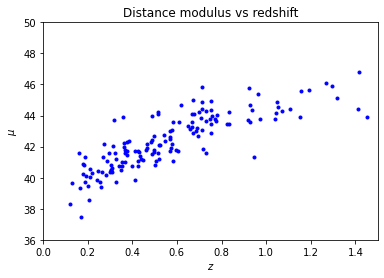

In [8]:
# Plot data
def plot_dist_mod():
    plt.figure(0)
    plt.plot(z_sample, mu_sample, "b.")
    plt.xlabel('$z$')
    plt.ylabel('$\mu$')
    plt.title('Distance modulus vs redshift')
    plt.ylim(36, 50)
    plt.xlim(0, 1.5)
plot_dist_mod()

Recall the normal equations for linear regression follow by analytically minimising the cost function: 

$$\min_\theta\ C(\theta) = \min_\theta \ (X \theta - y)^{\rm T}(X \theta - y).$$

Show analytically that the solution is given by 

$$ \hat{\theta} = \left( X^{\rm T} X \right)^{-1} X^{\rm T} y. $$

[Matrix calculus identities](https://en.wikipedia.org/wiki/Matrix_calculus) may be useful (note that we use the denominator layout convention).

Expand the cost function and drop terms that do not depend on $\theta$ (use latex mathematics expressions):

$$C(\theta) = (X \theta - y)^{\rm T}(X \theta - y)$$

$$C(\theta) = (X^{\rm T} \theta^{\rm T} - y^{\rm T})(X \theta - y)$$

$$C(\theta) = X^{\rm T} \theta^{\rm T}X \theta - X^{\rm T} \theta^{\rm T} y - y^{\rm T} X \theta + y^{\rm T} y$$

$$C(\theta) = X^{\rm T} \theta^{\rm T}X \theta - (X^{\rm T} \theta^{\rm T} y - y^{\rm T} X \theta) + y^{\rm T} y$$

$$C(\theta) = X^{\rm T} \theta^{\rm T}X \theta - 2X^{\rm T} \theta^{\rm T}y + y^{\rm T} y$$

$$C(\theta) = X^{\rm T} \theta^{\rm T}X \theta - 2X^{\rm T} \theta^{\rm T}y $$

Set the derivative to zero and solve for $\theta$ (use latex mathematics expressions):

$$\frac{ \partial{C(\theta)}}{ \partial{\theta}}$$ 

$$0 = X^{\rm T} \theta^{\rm T}X \theta - 2X^{\rm T} \theta^{\rm T}y $$

$$0 = X^{\rm T} \theta^{\rm T}X \theta - 2X \theta y^{\rm T} $$

$$0 = X^{\rm T} X \theta^{2} - 2X \theta y^{\rm T} $$

$$2X^{\rm T}X \theta - 2X^{\rm T}y = 0$$

Solve for $\theta$ by numerically implementing the analytic solution given above.

In [9]:
def compute_theta_lin_reg(X, y):
    # YOUR CODE HERE
    X_b = np.c_[np.ones((m,1)), X]
    theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return theta

In [10]:
assert compute_theta_lin_reg(z_sample, mu_sample).shape == (2,)
theta = compute_theta_lin_reg(z_sample, mu_sample)
(theta_c, theta_m) = theta
print("Linear regression parameters recovered analytically: intercept={0:.4f}, slope={1:.4f}".format(theta_c, theta_m))

Linear regression parameters recovered analytically: intercept=39.5505, slope=4.9538


In [11]:
check_var_defined('theta_c')
check_var_defined('theta_m')

theta_c defined.
theta_m defined.


Write a method to make a prediction for a given redshift.

In [12]:
def predict_lin_reg(theta, x):
    # YOUR CODE HERE
    X_new_b = np.c_[np.ones((len(x), 1)), x]
    y_predict = X_new_b.dot(theta)
    y = y_predict
    return y

Predict the distance modulus for a range of redshift values between 0.01 and 1.5 and plot the predicted curve overlayed on data (make a new plot; do not revise the plot above).  Call the variable used to store the predictions for your polynomial model `mu_pred_lin`.

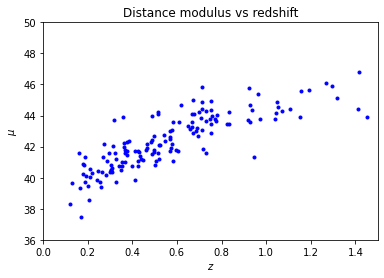

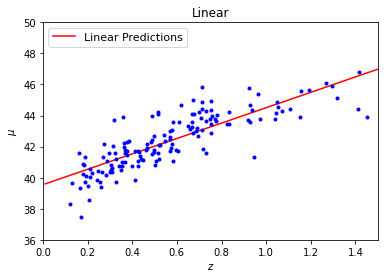

In [13]:
z = np.linspace(0.01, 1.5, 1000)
plot_dist_mod()
# YOUR CODE HERE

mu_pred_lin = predict_lin_reg(theta, z)

def plot_pred_linear():
    plt.figure(1)
    plt.plot(z, mu_pred_lin, "r-", label="Linear Predictions")
    plt.plot(z_sample, mu_sample, "b.")
    plt.xlabel('$z$')
    plt.ylabel('$\mu$')
    plt.title('Linear')
    plt.legend(loc="upper left", fontsize=11)
    plt.ylim(36, 50)
    plt.xlim(0, 1.5);


plot_pred_linear()

In [14]:
mu_pred_lin

array([39.6000522 , 39.60744073, 39.61482925, 39.62221778, 39.62960631,
       39.63699483, 39.64438336, 39.65177188, 39.65916041, 39.66654894,
       39.67393746, 39.68132599, 39.68871452, 39.69610304, 39.70349157,
       39.7108801 , 39.71826862, 39.72565715, 39.73304568, 39.7404342 ,
       39.74782273, 39.75521125, 39.76259978, 39.76998831, 39.77737683,
       39.78476536, 39.79215389, 39.79954241, 39.80693094, 39.81431947,
       39.82170799, 39.82909652, 39.83648505, 39.84387357, 39.8512621 ,
       39.85865062, 39.86603915, 39.87342768, 39.8808162 , 39.88820473,
       39.89559326, 39.90298178, 39.91037031, 39.91775884, 39.92514736,
       39.93253589, 39.93992442, 39.94731294, 39.95470147, 39.96208999,
       39.96947852, 39.97686705, 39.98425557, 39.9916441 , 39.99903263,
       40.00642115, 40.01380968, 40.02119821, 40.02858673, 40.03597526,
       40.04336379, 40.05075231, 40.05814084, 40.06552936, 40.07291789,
       40.08030642, 40.08769494, 40.09508347, 40.102472  , 40.10

In [15]:
check_var_defined('mu_pred_lin')
assert mu_pred_lin.shape == (len(z),)

mu_pred_lin defined.


In [16]:
z

array([0.01      , 0.01149149, 0.01298298, 0.01447447, 0.01596597,
       0.01745746, 0.01894895, 0.02044044, 0.02193193, 0.02342342,
       0.02491491, 0.02640641, 0.0278979 , 0.02938939, 0.03088088,
       0.03237237, 0.03386386, 0.03535536, 0.03684685, 0.03833834,
       0.03982983, 0.04132132, 0.04281281, 0.0443043 , 0.0457958 ,
       0.04728729, 0.04877878, 0.05027027, 0.05176176, 0.05325325,
       0.05474474, 0.05623624, 0.05772773, 0.05921922, 0.06071071,
       0.0622022 , 0.06369369, 0.06518519, 0.06667668, 0.06816817,
       0.06965966, 0.07115115, 0.07264264, 0.07413413, 0.07562563,
       0.07711712, 0.07860861, 0.0801001 , 0.08159159, 0.08308308,
       0.08457457, 0.08606607, 0.08755756, 0.08904905, 0.09054054,
       0.09203203, 0.09352352, 0.09501502, 0.09650651, 0.097998  ,
       0.09948949, 0.10098098, 0.10247247, 0.10396396, 0.10545546,
       0.10694695, 0.10843844, 0.10992993, 0.11142142, 0.11291291,
       0.1144044 , 0.1158959 , 0.11738739, 0.11887888, 0.12037

Solve for the parameters $\theta$ using Scikit-Learn.

In [17]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
# YOUR CODE HERE
z_sample_reshape = z_sample.reshape(-1, 1)
lin_reg.fit(z_sample_reshape, mu_sample)

LinearRegression()

In [18]:
print("Linear regression parameters recovered by scikit-learn: intercept={0:.4f}, slope={1:.4f}"
      .format(lin_reg.intercept_, lin_reg.coef_[0]))

Linear regression parameters recovered by scikit-learn: intercept=39.5505, slope=4.9538


Extend your model to include polynomial features up to degree 15 (using Scikit-Learn).  Use variable `lin_reg_poly` for your revised model.

In [19]:
degree = 15
bias = False
from sklearn.preprocessing import PolynomialFeatures
def compute_poly_features(degree, bias):
    # Return polynomial features of samples and class
    # YOUR CODE HERE
    poly_features = PolynomialFeatures(degree=degree, include_bias=bias)
    z_poly = poly_features.fit_transform(z_sample.reshape(-1,1))
    z_sample_poly, poly_features = z_sample.reshape(-1,1)[0], z_poly[0]
    return z_sample_poly, poly_features
z_sample_poly, poly_features = compute_poly_features(degree, bias)
poly_features = PolynomialFeatures(degree=degree, include_bias=bias)
z_poly = poly_features.fit_transform(z_sample.reshape(-1,1))
# Train model
# YOUR CODE HERE
lin_reg = LinearRegression()
lin_reg.fit(z_poly, mu_sample)
lin_reg_poly = lin_reg.intercept_, lin_reg.coef_

In [20]:
check_var_defined('lin_reg_poly')

lin_reg_poly defined.


Plot the data and the predictions of your models considered so far (linear and polynomial regression).  Call the variable used to store the predictions for your polynomial model `mu_pred_poly`.

(None, None)

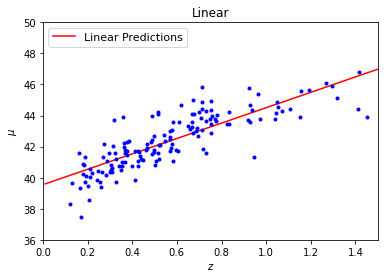

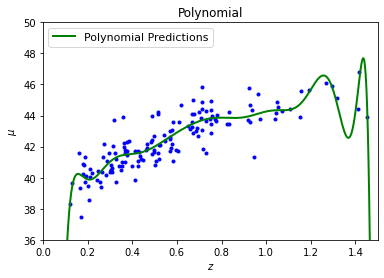

In [21]:
# YOUR CODE HERE
z_new = z.reshape(-1,1)
z_new_poly = poly_features.transform(z_new)
mu_pred_poly = lin_reg.predict(z_new_poly)

def plot_pred_poly():
    plt.figure(2)
    plt.plot(z_sample, mu_sample, "b.")
    plt.plot(z_new, mu_pred_poly, "g-", linewidth=2, label="Polynomial Predictions")
    plt.xlabel('$z$')
    plt.ylabel('$\mu$')
    plt.title('Polynomial')
    plt.ylim(36, 50)
    plt.xlim(0, 1.5)
    plt.legend(loc="upper left", fontsize=11)


plot_pred_linear(), plot_pred_poly()

In [22]:
check_var_defined('mu_pred_poly')
assert mu_pred_poly.shape == (len(z),)

mu_pred_poly defined.


Comment on the accuracy of your models.

For the linear prediction, it shows a less accuracy in terms of the comparison with the actual data. This model contains a larger gap between the predicted points and actual points, too high bias could lead to a potential underfitted issue. It is too regularized and it may only able to provide a general overview and trend of the data. For the polynomial model, it relatively better describes and predicts the shape of the data. The prediction line is followed based on the polynomial features. However, it contains a high level of noises. it could have a overfitting issue as there are too high expected ability of the model to fluctuate (high variance).

Improve your polynomial model and use the improved model to make predictions.  Call the variable used to store the predictions for your polynomial model `mu_pred_poly_improved`.

In [23]:
# YOUR CODE HERE
from sklearn.linear_model import Ridge

ridgereg = Ridge(alpha=1)
ridgereg.fit(z_poly, mu_sample)
mu_pred_poly_improved = ridgereg.predict(z_new_poly)

In [ ]:
mu_pred_poly_improved

In [24]:
check_var_defined('mu_pred_poly_improved')
assert mu_pred_poly_improved.shape == (len(z),)

mu_pred_poly_improved defined.


Plot the predictions made with new model and all previous models considered.

(None, None, None)

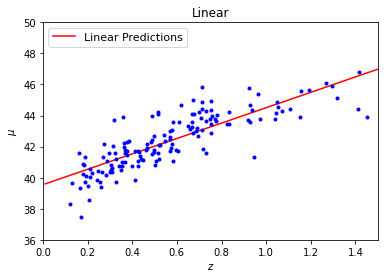

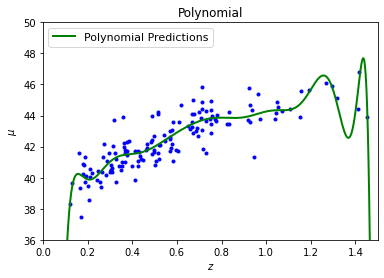

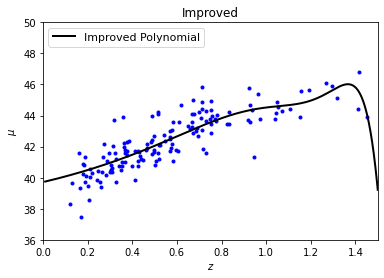

In [25]:
# YOUR CODE HERE
def plot_pred_improved():
    plt.figure(3)
    plt.plot(z_sample, mu_sample, "b.")
    plt.plot(z_new, mu_pred_poly_improved, "k-", linewidth=2, label="Improved Polynomial")
    plt.xlabel('$z$')
    plt.ylabel('$\mu$')
    plt.title('Improved')
    plt.legend(loc="upper left", fontsize=11)
    plt.ylim(36, 50)
    plt.xlim(0, 1.5)

plot_pred_linear(), plot_pred_poly(), plot_pred_improved()

Compute the RMS error between your predictions and the *data samples*.

In [26]:
# Define a general function to compute the RMS error
# YOUR CODE HERE
def compute_rms(mu_1, mu_2):
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    rms = sqrt(mean_squared_error(mu_1, mu_2))
    return rms

In [27]:
assert np.isclose(compute_rms(mu_pred_lin, mu_pred_lin), 0.0)

In [28]:
# Compute the RMS error between the data and the predictions for each model.
# Use variables rms_sample_lin, rms_sample_poly and rms_sample_poly_improved.
# YOUR CODE HERE

rms_sample_lin = compute_rms(z, mu_pred_lin)
rms_sample_poly = compute_rms(z_new, mu_pred_poly)
rms_sample_poly_improved = compute_rms(z_new, mu_pred_poly_improved)

In [29]:
# Print RMS values computed.
print("rms_sample_lin = {0:.4f}".format(rms_sample_lin))
print("rms_sample_poly = {0:.4f}".format(rms_sample_poly))
print("rms_sample_poly_improved = {0:.4f}".format(rms_sample_poly_improved))

rms_sample_lin = 42.5697
rms_sample_poly = 42.8764
rms_sample_poly_improved = 42.3170


In [30]:
check_var_defined('rms_sample_lin')

rms_sample_lin defined.


In [31]:
check_var_defined('rms_sample_poly')

rms_sample_poly defined.


In [32]:
check_var_defined('rms_sample_poly_improved')

rms_sample_poly_improved defined.


Comment on what models you believe are best.

The Root Mean Sqaure Error (RMSE) enables to estimate the standard deviation of the distribution of our errors. It measuring the distance between the predicted point and actual point. The lower RMS shows the better fit of the model comparing to the predication.

Among three observations, all of those are recorded a RMS at approximately 42 to nearly 43. The highest rms is the polynomial predication method (42.9864), indicating that the distance between predicted and actual values are slightly farther than other approaches. The higher variance could affect users to precisely forecast the trend of the redshift data. The linear model ranks in the middle, with 42.5697. Although it does not result the lowest RMS, the RMS of the linear model could still be acceptable for prediction amongs these three models.

In comparison, the improved polynomial approach has the best suitability for predication, with the lowest RMS (42.317). It demonstrates that the improved model is more accurate to predict the response. It has a RMS difference at around 0.56 comparing to polynomial model. As lower RMS show the better fit of model, therefore the improved polynomial model is the best.

Using our cosmological concordance model we can predict the theoretical distance modulus vs redshift relationship using our understanding of the physics.

In [33]:
from astroML.cosmology import Cosmology
cosmo = Cosmology()
mu_cosmo = np.array(list(map(cosmo.mu, z)))

        Use astropy.cosmology instead. [warnings]


Plot the data, predictions made with all regression models, and the values predicted by the cosmological model.

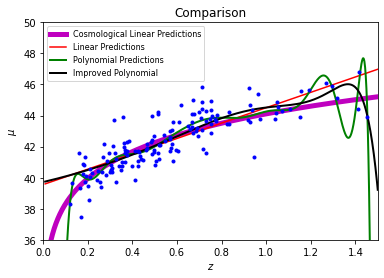

In [34]:
# YOUR CODE HERE
plt.plot(z, mu_cosmo, "m-",linewidth=5, label="Cosmological Linear Predictions")
plt.plot(z, mu_pred_lin, "r-", label="Linear Predictions")
plt.plot(z_new, mu_pred_poly, "g-", linewidth=2, label="Polynomial Predictions")
plt.plot(z_new, mu_pred_poly_improved, "k-", linewidth=2, label="Improved Polynomial")
plt.plot(z_sample, mu_sample, "b.")
plt.xlabel('$z$')
plt.ylabel('$\mu$')
plt.title('Comparison')
plt.legend(loc="upper left", fontsize=8)
plt.ylim(36, 50)
plt.xlim(0, 1.5);

Compute the RMS error between the predictions made by the cosmological model and each of the regression models, over the sample array `z`.

In [35]:
# Compute the RMS error between the data and the predictions for each model.
# Use variables rms_cosmo_lin, rms_cosmo_poly and rms_cosmo_poly_improved.
# YOUR CODE HERE
rms_cosmo_lin = compute_rms(mu_cosmo, mu_pred_lin)
rms_cosmo_poly = compute_rms(mu_cosmo, mu_pred_poly)
rms_cosmo_poly_improved = compute_rms(mu_cosmo, mu_pred_poly_improved)

In [36]:
# Print RMS values computed.
print("rms_cosmo_lin = {0:.4f}".format(rms_cosmo_lin))
print("rms_cosmo_poly = {0:.4f}".format(rms_cosmo_poly))
print("rms_cosmo_poly_improved = {0:.4f}".format(rms_cosmo_poly_improved))

rms_cosmo_lin = 1.1252
rms_cosmo_poly = 20.6659
rms_cosmo_poly_improved = 1.1893


In [37]:
check_var_defined('rms_cosmo_lin')

rms_cosmo_lin defined.


In [38]:
check_var_defined('rms_cosmo_poly')

rms_cosmo_poly defined.


In [39]:
check_var_defined('rms_cosmo_poly_improved')

rms_cosmo_poly_improved defined.


Comment on the RMS values computed and the implications for the accuracy of the different regression models considered.

Sinificantly, the original polynomial model has the highest dispersion comparing to the cosmological model, with a RSM difference at 20.6659. It reflects that such prediction does not fit with the result conducted by the cosmological model. On the other hand, linear and improved polynomial models have recorded an outstanding RSM, both with approximately 1.1 to 1.2. It shows that our predictions on these two models hold a high similiarity with the result from the cosmological model, just with a slight difference. To sum up, the accuracy of linear and improved polynomial models are the best in comparison to the cosmological model.

---

## Part 2: Classification

In these exercises we will consider classification of [RR Lyrae](https://en.wikipedia.org/wiki/RR_Lyrae_variable) variable stars.  RR Lyrae variables are often used as standard candles to measure astronomical distances since their period of pulsation can be related to their absolute magnitude.

Observations of star magnitudes are made in each [SDSS filter band](http://skyserver.sdss.org/dr2/en/proj/advanced/color/sdssfilters.asp): u, g, r, i, z.

We will consider the space of astronomical "colours" to distinguish RR Lyraes from background stars.  Astronomical colours are simply differences in magnitudes between bands, e.g. u-g, g-r, r-i, i-z.  You can find further background [here](https://en.wikipedia.org/wiki/Color%E2%80%93color_diagram).

First, download the data.  (This may take some time on first execution.  Subsequently executions will read from cached data on your system.)

In [40]:
# Load data
from astroML.datasets import fetch_rrlyrae_combined
X, y = fetch_rrlyrae_combined()

[========================================]  78.8kb / 78.8kb   
downloading cross-matched SDSS/2MASS dataset from https://github.com/astroML/astroML-data/raw/master/datasets/stripe82calibStars_v2.6.dat.gz to /home/jovyan/astroML_data
[=========================================]  63.58Mb / 63.58Mb   
uncompressing file...


You can learn more about the format of the returned data [here](http://www.astroml.org/modules/generated/astroML.datasets.fetch_rrlyrae_combined.html).  In particular, note that the columns of `X` are u-g, g-r, r-i, i-z.

Construct a Pandas DataFrame for the `X` data and a Series for the `y` data.  Call your Pandas objects `X_pd` and `y_pd` respectively.

Be sure to give your colums the correct colour name, e.g. 'u-g'.

In [41]:
import pandas as pd
cols=['u-g', 'g-r', 'r-i', 'i-z']
# YOUR CODE HERE
X_pd = pd.DataFrame(X, columns=cols)

In [42]:
check_var_defined('X_pd')
X_pd.head()

X_pd defined.


,u-g,g-r,r-i,i-z
0,1.250999,0.394000,0.137000,0.061999
1,1.048000,0.339001,0.151999,0.023001
2,1.008001,0.341999,0.129000,0.203001
3,0.965000,0.392000,0.149000,0.150000
4,1.040001,0.333000,0.125999,0.101999


In [43]:
# YOUR CODE HERE
y_pd = pd.Series(y)

In [44]:
check_var_defined('y_pd')
y_pd.head()

y_pd defined.


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
dtype: float64

Combine your data and targets into a single Pandas DataFrame, labelling the target column 'target'.  Call the resulting Pandas DataFrame `X_pd_all`.

In [45]:
# YOUR CODE HERE
X_pd_all = X_pd.merge(y_pd.to_frame(name='target'), left_index=True, right_index=True)

In [46]:
check_var_defined('X_pd_all')
X_pd_all.head()

X_pd_all defined.


,u-g,g-r,r-i,i-z,target
0,1.250999,0.394000,0.137000,0.061999,0.0
1,1.048000,0.339001,0.151999,0.023001,0.0
2,1.008001,0.341999,0.129000,0.203001,0.0
3,0.965000,0.392000,0.149000,0.150000,0.0
4,1.040001,0.333000,0.125999,0.101999,0.0


Add a 'target description' column to your existing `X_pd_all` DataFrame, with fields 'Background' and 'RR Lyrae' to specify the target type.

In [47]:
# YOUR CODE HERE
X_pd_all['target description'] = X_pd_all['target'].replace({0:'Background', 1:'RR Lyrae'})

In [48]:
X_pd_all.head()
X_pd_all.tail()

,u-g,g-r,r-i,i-z,target,target description
93136,0.962999,0.059000,-0.025999,-0.025000,1.0,RR Lyrae
93137,1.059999,0.185001,0.050999,-0.023998,1.0,RR Lyrae
93138,1.044001,0.212000,0.035000,0.002001,1.0,RR Lyrae
93139,1.064999,0.172001,0.042000,0.003000,1.0,RR Lyrae
93140,1.125999,0.065001,-0.017000,-0.057999,1.0,RR Lyrae


How many RR Lyrae variable stars are there in the dataset (i.e compute `n_rrlyrae`)?

In [49]:
# YOUR CODE HERE
n_rrlyrae = len(X_pd_all[X_pd_all['target description'] == "RR Lyrae"])

In [50]:
check_var_defined('n_rrlyrae')
print("n_rrlyrae = {0}".format(n_rrlyrae))

n_rrlyrae defined.
n_rrlyrae = 483


How many background stars are there in the dataset (i.e. compute `n_background`)?

In [51]:
# YOUR CODE HERE
n_background = len(X_pd_all[X_pd_all['target description'] == "Background"])

In [52]:
check_var_defined('n_background')
print("n_background = {0}".format(n_background))

n_background defined.
n_background = 92658


Plot scatter plot pairs for all colour combinations using `seaborn`.  Colour the points by target type.

In [53]:
%matplotlib inline
import seaborn as sns; sns.set()

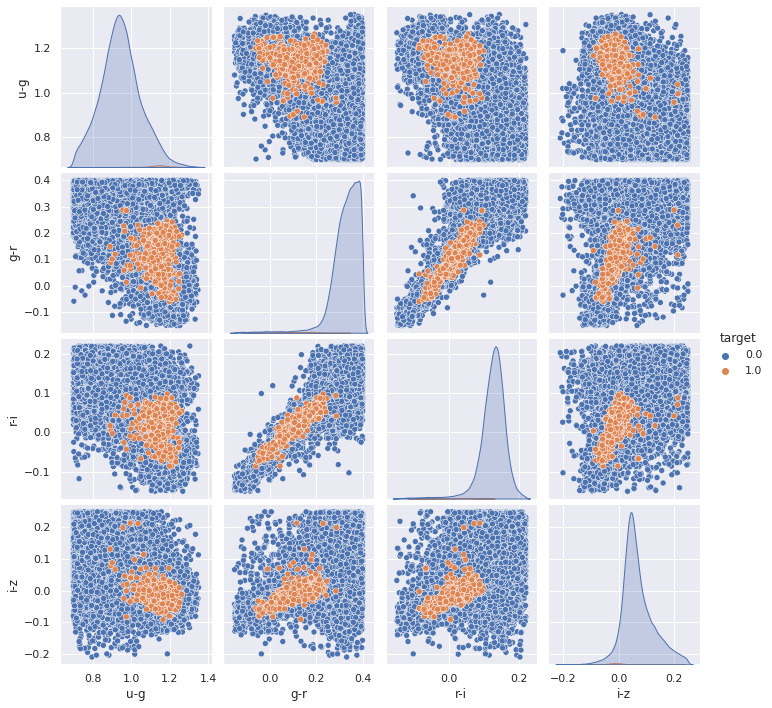

In [54]:
# YOUR CODE HERE
sns.pairplot(X_pd_all, hue='target')

Let's separate the data into training and test sets, keeping 25% of the data for testing.  

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

First let's consider 1D classification for the zeroth colour, i.e. $u-g$. 

In [56]:
ind = 0
col=cols[ind]
col

'u-g'

In [57]:
X_train_1d = X_train[:, ind]
X_train_1d = X_train_1d.reshape(-1,1)
X_test_1d = X_test[:, ind]
X_test_1d = X_test_1d.reshape(-1,1)

To get some further intuition about the 1D classiciation problem consider a 1D plot of
class against colour.

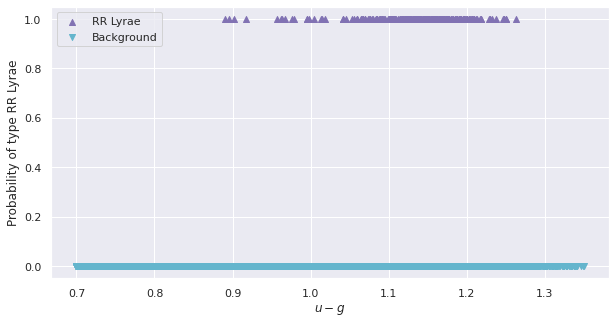

In [58]:
def plot_scatter():
    plt.figure(figsize=(10,5))
    plt.scatter(X_train_1d[y_train==1], y_train[y_train==1], c='m', marker='^', label='RR Lyrae')
    plt.scatter(X_train_1d[y_train==0], y_train[y_train==0], c='c', marker='v', label='Background')
    plt.xlabel('$' + col + '$')
    plt.ylabel('Probability of type RR Lyrae')
plot_scatter()    
plt.legend()

Given the plot shown above, comment on how well you expect logistic regression to perform.

Based on the plot shown above, the logistic regression is expected to perform two S-shape lines. For the RR Lyrae type, the probability would be low as 0 or nearly 0 at the beginning, and then slightly increasing while the enhancement of the value of "u-g". When the value reaches around 0.88, it is expected to rise up to the probability of 1 and continue until the value equals to around 1.26.

On the other hand, there is a high probability for the data set to detect as "Background". As a result, the logistic regression line would be a straight line at the probability of 1 between the "u-g" of value is 0.68 and 1.36. And then fall down afterwards.

Where would you guess the decision bounary should lie?  Set the variable `decision_boundary_guess` to your guess.

In [59]:
# YOUR CODE HERE
decision_boundary_guess = 1.26

In [60]:
check_var_defined('decision_boundary_guess')
print("decision_boundary_guess = {0:.4f}".format(decision_boundary_guess))

decision_boundary_guess defined.
decision_boundary_guess = 1.2600


Use Scikit-Learn to perform logistic regression to classify the two classes for this 1D problem.

First, set the inverse regularation strength `C` such that regularisation is effecitvely not performed.

In [61]:
C = 1e10

Second, fit the model using Scikit-Learn. Use the variable `clf` for your classification model.

In [62]:
# YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
log_reg_C = LogisticRegression(C=C, random_state=42)
clf = log_reg_C.fit(X_train_1d, y_train)
log_reg_C.coef_, log_reg_C.intercept_

(array([[15.81856251]]), array([-21.70227621]))

In [63]:
check_var_defined('clf')

clf defined.


Compute the decision boundary of the logistic regression model fitted by Scikit-Learn.  User variable `decision_boundary_sklearn` for your result.

(Ensure your result is a scalar and not an array of length 1.)

In [64]:
# YOUR CODE HERE
decision_boundary_sklearn_result = -(clf.intercept_ / clf.coef_)
decision_boundary_sklearn = decision_boundary_sklearn_result.item()

In [65]:
check_var_defined('decision_boundary_sklearn')
assert not hasattr(decision_boundary_sklearn, "__len__")
print("decision_boundary_sklearn = {0:.4f}".format(decision_boundary_sklearn))

decision_boundary_sklearn defined.
decision_boundary_sklearn = 1.3719


Evaluate the probabilities prediced by your logistic regression model over the domain specified by the variable `X_1d_new`. Use variable `y_1d_proba` for your computed probabilities.

In [66]:
X_1d_new = np.linspace(0.3, 2.0, 1000).reshape(-1, 1)
# YOUR CODE HERE
y_1d_proba = log_reg_C.predict_proba(X_1d_new)

In [67]:
check_var_defined('y_1d_proba')

y_1d_proba defined.


Plot the probability of a star being of type RR Lyrae against the colour variable considered.  Also plot the probability of being a Background star.  Overlay these plots on the scatter plot of class types.  Also plot the decision boundary that you guessed previously and the one computed by Scikit-Learn.

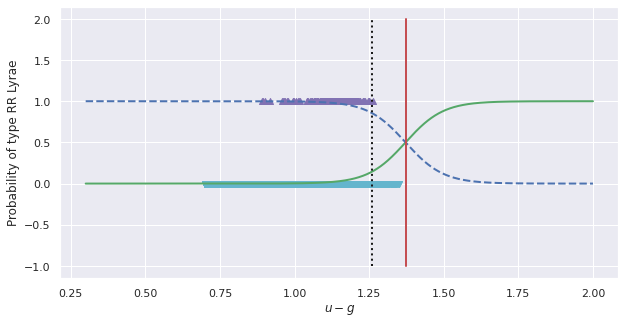

In [68]:
plot_scatter()
# YOUR CODE HERE
plt.plot(X_1d_new, y_1d_proba[:, 1], "g-", linewidth=2, label="RR Lyrae")
plt.plot(X_1d_new, y_1d_proba[:, 0], "b--", linewidth=2, label="Background")
plt.plot([decision_boundary_guess, decision_boundary_guess], [-1, 2], "k:", linewidth=2)
plt.plot([decision_boundary_sklearn, decision_boundary_sklearn], [-1, 2], "r-", linewidth=2)
#plt.plot(X_train_1d, cost_one, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
#plt.plot(X_train_1d, decision_boundary_sklearn)

From inspection of your plot, how would all objects in the training set be classified?

All objects would be classifiled as two types, the blue dash line represets the RR lyrae all on the left (probability less than 0.5) and the green line represents the Background all on the right (probability greater than 0.5). The determination is driven by the decision boundary. Once the value of "u-g" is over the decision boundary, it is very likely to be a class of Background.

Use your logistic regression model fitted by Scikit-Learn to predict the class of all objects in the test set. User variable `y_test_1d_pred` to specify your answer.

In [69]:
# YOUR CODE HERE
log_reg_test = LogisticRegression(C = C, random_state=42)
log_reg_test.fit(X_test_1d, y_test)
y_test_1d_pred = log_reg_test.predict(X_test_1d)

In [70]:
check_var_defined('y_test_1d_pred')

y_test_1d_pred defined.


How many objects are classified as of type RR Lyrae?  Use variable `n_rrlyrae_pred` to specify your answer.

In [71]:
# YOUR CODE HERE
n_rrlyrae_pred_result = X_test_1d[y_test== 1]
n_rrlyrae_pred = np.count_nonzero(n_rrlyrae_pred_result > 0)

In [72]:
check_var_defined('n_rrlyrae_pred')
assert n_rrlyrae_pred % 1 == 0 # check integer
print("n_rrlyrae_pred = {0}".format(n_rrlyrae_pred))

n_rrlyrae_pred defined.
n_rrlyrae_pred = 127


How many objects are classified as of type Background?  Use variable `n_background_pred` to specify your answer.

In [73]:
# YOUR CODE HERE
n_background_pred_result = X_test_1d[y_test== 0]
n_background_pred = np.count_nonzero(n_background_pred_result > 0)

In [74]:
check_var_defined('n_background_pred')
assert n_background_pred % 1 == 0 # check integer
print("n_background_pred = {0}".format(n_background_pred))

n_background_pred defined.
n_background_pred = 23159


Let's check the Scikit-Learn result by solving the logistic regression problem (without regularisation) manually.

Recall that the cost function for logistic regression is given by
$$
C(\theta) = -\frac{1}{m} \sum_{i=1}^m 
\left [ 
y^{(i)} \log(\hat{p}^{(i)})
+
(1 - y^{(i)}) \log(1 - \hat{p}^{(i)})
\right],
$$


where

$$\hat{p} = \sigma(\theta^\text{T} x) = \frac{1}{1+\exp{(-\theta^\text{T} x)}}. $$

Show analytically that the derivative of the cost function is given by
$$\begin{eqnarray}
\frac{\partial C}{\partial \theta} 
&=& 
\frac{1}{m} \sum_{i=1}^m 
\left[ \sigma\left(\theta^{\rm T} x^{(i)} \right) - y^{(i)} \right]
x^{(i)}\\
&=&
\frac{1}{m} 
X^{\rm T}
\left[ \sigma\left(X \theta \right) - y \right]
\end{eqnarray}$$

(use latex mathematics expressions).

First, simplify the cost function terms $\log(\hat{p})$ and $\log(1-\hat{p})$ to express in terms linear in $\log\left({1+{\rm e}^{-\theta^{\rm T}x}}\right)$.

(You may drop $i$ superscripts for notational brevity.)

$$\hat{p} = \frac{1}{1+\exp{(-\theta^\text{T} x)}}$$



$$\begin{eqnarray}
log(\hat{p}) = log(\frac{1}{1+\exp{(-\theta^\text{T} x)}})
&=&
log(1) - log({1+e^{(-\theta^\text{T} x)}})
&=&
-log({1+e^{(-\theta^\text{T} x)}})
\end{eqnarray}$$



$$\begin{eqnarray}
log(1-\hat{p}) = 1 - log(\frac{1}{1+\exp{(-\theta^\text{T} x)}})
&=&
log(\frac{1+\exp{(-\theta^\text{T} x)}}{1+\exp{(-\theta^\text{T} x)}})   - log(\frac{1}{1+\exp{(-\theta^\text{T} x)}})
\end{eqnarray}$$

$$\begin{eqnarray}
= log(\frac{e^{(-\theta^\text{T} x)}}{1+e^{(-\theta^\text{T} x)}})
&=&
log(e^{(-\theta^\text{T} x)} - log({1+e^{(-\theta^\text{T} x)}})
&=&
= -\theta^\text{T} x log_e e - log({1+e^{(-\theta^\text{T} x)}})
\end{eqnarray}$$

Next, substitute these terms into the cost function and simplify to also express the cost function in terms linear in $\log\left({1+{\rm e}^{-\theta^{\rm T}x}}\right)$.

$$
C(\theta) = -(y)log({1+e^{(-\theta^\text{T} x)}}) + (1-y)log(\frac{e^{(-\theta^\text{T} x)}}{1+e^{(-\theta^\text{T} x)}})
$$

$$
= -(y)log({1+e^{(-\theta^\text{T} x)}}) + (1-y) (log(e^{(-\theta^\text{T} x)}) - log({1+e^{(-\theta^\text{T} x)}}))
$$

$$
= -(y)log({1+e^{(-\theta^\text{T} x)}}) + (1-y) -\theta^\text{T} x log_e e - log({1+e^{(-\theta^\text{T} x)}})
$$

$$
= -(y)log({1+e^{(-\theta^\text{T} x)}}) - \theta^\text{T} x - log({1+e^{(-\theta^\text{T} x)}}) + \theta^\text{T} x y + (y)log({1+e^{(-\theta^\text{T} x)}})
$$

$$
= - \theta^\text{T} x - log({1+e^{(-\theta^\text{T} x)}}) + \theta^\text{T} x y 
$$

$$
= (y - 1)\theta^\text{T} x - log({1+e^{(-\theta^\text{T} x)}})
$$

Now compute the derivative of the cost function with respect to variable $\theta_j$, i.e. compute $\partial C / \partial \theta_j$.

$$\begin{eqnarray}
\frac{\partial C}{\partial \theta_j} 
&=& 
\left[ \sigma\left(\theta^{\rm T} x \right) - y_j \right]
x_j
\end{eqnarray}
$$

$$
= [-log({1+e^{(-\theta^\text{T} x)}}) - y_j]x_j
$$


Combine terms for all $\theta_j$ to give the overall derivative with respect to $\theta$, i.e. $\partial C / \partial \theta$.

$$
\frac{\partial C}{\partial \theta} = \frac{1}{m} \sum_{i=1}^m [ \sigma(\theta^{\rm T} x) - y^{(i)}]x^{(i)}
$$

$$
= \frac{1}{m} \sum_{i=1}^m [-log({1+e^{(-\theta^\text{T}x )}})  - y^{(i)}]x^{(i)}
$$

$$
= \frac{1}{m} X^{T} [-log({1+e^{(-\theta^\text{T}x )}})  - y]
$$

Using the analytically expression for the derivative of the cost function, we will solve the logistic regression problem by implementing a gradient descent algorithm.

First, define the sigmoid function.

In [75]:
def sigmoid(x):
    # YOUR CODE HERE
    sig = 1 / (1 + np.exp(-x))
    return sig

In [76]:
assert np.isclose(sigmoid(0), 0.5)

Next, extend the training data to account for a bias term in your model. Use variable `X_train_1d_b` to specify your result.

In [77]:
# YOUR CODE HERE
X_train_1d_b = np.c_[np.ones((len(X_train_1d), 1)), X_train_1d]

In [78]:
check_var_defined('X_train_1d_b')

X_train_1d_b defined.


Implement batch gradient descent to fit the parameters of your logistic regression model.  Consider `n_iterations = 40000` iterations and a learning rate of `alpha = 10.0`. Consider a starting point of $\theta_0 = (1, 1)$, i.e. `theta = np.array([[1], [1]])`. Use variable `theta` to specify your estimated parameters.

In [79]:
n_iterations = 40000
alpha = 10.0
theta = np.array([[1], [1]])
# YOUR CODE HERE
y_train_1d = y_train.reshape(-1,1)

for iteration in range (n_iterations):
    X_train_1d_b_theta = np.matmul(X_train_1d_b, theta)
    gradients = 2/(len(X_train_1d_b)) * X_train_1d_b.T.dot(X_train_1d_b_theta - y_train_1d)
theta = theta - alpha * gradients

In [80]:
check_var_defined('theta')
print("theta[0] = {0:.4f}".format(theta[0][0]))
print("theta[1] = {0:.4f}".format(theta[1][0]))

theta defined.
theta[0] = -37.8016
theta[1] = -35.8723


Compute the difference between the logistic regression model intercept computed by Scikit-Learn and manually.  Use variable `intercept_diff` for your result.

In [81]:
# YOUR CODE HERE
intercept_diff_result = theta[0] - clf.intercept_
intercept_diff = intercept_diff_result[0]

In [82]:
check_var_defined('intercept_diff')
print("intercept_diff = {0:.4E}".format(intercept_diff))

intercept_diff defined.
intercept_diff = -1.6099E+01


Compute the difference between the logistic regression model *slope* (i.e. coefficient) computed by Scikit-Learn and manually.  Use variable `coeff_diff` for your result.

In [83]:
# YOUR CODE HERE
coeff_diff_result = theta[1] - clf.coef_[0]
coeff_diff = coeff_diff_result[0]

In [84]:
check_var_defined('coeff_diff')
print("coeff_diff = {0:.4E}".format(coeff_diff))

coeff_diff defined.
coeff_diff = -5.1691E+01


You should find that the solution from your gradient descent algorithm is close (although not identical) to that recovered by Scikit-Learn. 

Both fitted logistic regression models, however, are not effective. The reason for this is because of class imbalance.  Describe the class imbalance problem in your own words and how it manifests itself in the classification problem at hand.

Imbalanced classification is regarded as to a classification predictive modeling problem where the number of instances in the training dataset for each class label is not balanced (class distribution is skewed). For example, within this dataset, there are imbalanced amount of 23159 examples of Background and 127 examples of RR Lyrae.  RR Lyrae has very low proportions in the training data as compared to Background.

The cause of the class imbalance problem could due to biased sampling and measurement errors. Data may be collected from a narrow region or the labelling was distributed wrongly at first. 

In this case, it has a severe imbalance problem. It would leaad to a challenge to model (accuracy) and it could require the use of specialised techniques.

The class imbalance problem can be addressed by weighting the training data in a manner that is inversely proportional to their frequency.

Repeat the fitting of your linear regression model but this time perform class weighting.  Use variable `clf_balanced` for your new model.

See the `class_weight` argument of the Scikit-Learn [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier for further details on how to perform class weighting.

In [85]:
# YOUR CODE HERE
clf_balanced = LogisticRegression(C=C, class_weight='balanced', random_state=42).fit(X_train_1d, y_train)

In [86]:
check_var_defined('clf_balanced')

clf_balanced defined.


Compute the decision boundary of the logistic regression model fitted by Scikit-Learn when weighting classes.  

(Ensure your result is a scalar and not an array of length 1.)

In [87]:
# YOUR CODE HERE
decision_boundary_balanced = -clf_balanced.intercept_/clf_balanced.coef_
decision_boundary_sklearn_balanced = decision_boundary_balanced.item()

In [88]:
check_var_defined('decision_boundary_sklearn_balanced')
assert not hasattr(decision_boundary_sklearn_balanced, "__len__")
print("decision_boundary_sklearn_balanced = {0:.4f}".format(decision_boundary_sklearn_balanced))

decision_boundary_sklearn_balanced defined.
decision_boundary_sklearn_balanced = 1.0597


Evaluate the probabilities prediced by your new logistic regression model over the domain specified by the variable `X_1d_new`. Use variable `y_1d_proba_balanced` for your computed probabilities.

In [89]:
# YOUR CODE HERE
y_1d_proba_balanced = clf_balanced.predict_proba(X_1d_new)

In [90]:
check_var_defined('y_1d_proba_balanced')

y_1d_proba_balanced defined.


For your new balanced model, plot the probability of a star being of type RR Lyrae against the colour variable considered.  Also plot the probability of being a Background star.  Overlay these plots on the scatter plot of class types.  Also plot the decision boundary that you guessed previously, the one computed by Scikit-Learn initially, and the one computed by Scikit-Learn for your new balanced model.

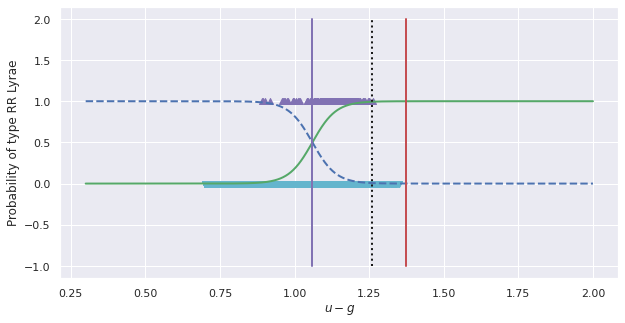

In [91]:
plot_scatter()
# YOUR CODE HERE
plt.plot(X_1d_new, y_1d_proba_balanced[:, 1], "g-", linewidth=2, label="RR Lyrae")
plt.plot(X_1d_new, y_1d_proba_balanced[:, 0], "b--", linewidth=2, label="Background")
plt.plot([decision_boundary_guess, decision_boundary_guess], [-1, 2], "k:", linewidth=2)
plt.plot([decision_boundary_sklearn, decision_boundary_sklearn], [-1, 2], "r-", linewidth=2)
plt.plot([decision_boundary_sklearn_balanced, decision_boundary_sklearn_balanced], [-1, 2], "m-", linewidth=2)

Comment on the decision boundary of the balanced model compared to the unbalanced models fitted previously.

After we balanced the model, the curves of two classes andthe entire equilibrium shifted to the left. As a consequence, the computed decision boundary on guessed and sklearn versions are being obsolete and inaccurate for the balanced model. The previous decision boundaries are around 1.25 and 1.3. Whereas for the balanced model, it moves to nearly 1.06. Therefore, the new decision boundary provides a better accuracy to determine classes in the balanced model.

Now that we've built up good intuition surrounding the subtleties of the classification problem at hand in 1D, let's consider the 2D problem (we will keep to 2D for plotting convenience).

For the 2D case we consider the following colours.

In [92]:
ind = 1
cols[:ind+1]

['u-g', 'g-r']

Consider the following training and test data for the 2D problem.

In [93]:
X_train_2d = X_train[:, :ind+1]
X_train_2d = X_train_2d.reshape(-1,ind+1)
X_test_2d = X_test[:, :ind+1]
X_test_2d = X_test_2d.reshape(-1,ind+1)

Train a logistic regression model for this 2D problem.  Use variable `clf_2d_logistic` for your classifier.

In [94]:
# YOUR CODE HERE
clf_2d_logistic = LogisticRegression(random_state=42,class_weight='balanced').fit(X_train_2d, y_train)

In [95]:
check_var_defined('clf_2d_logistic')

clf_2d_logistic defined.


Compute the precision and recall of your 2D logistic regression model. Use variables `precision_logistic` and `recall_logistic` for your results.

In [96]:
# YOUR CODE HERE
from sklearn.metrics import precision_recall_fscore_support
clf_2d_pred = clf_2d_logistic.predict(X_test_2d)
precision_logistic = precision_recall_fscore_support(y_test, clf_2d_pred, average='weighted')[0]
recall_logistic = precision_recall_fscore_support(y_test, clf_2d_pred, average='weighted')[1]

In [97]:
check_var_defined('precision_logistic')
print("precision_logistic = {0:.6f}".format(precision_logistic))

precision_logistic defined.
precision_logistic = 0.995248


In [98]:
check_var_defined('recall_logistic')
print("recall_logistic = {0:.6f}".format(recall_logistic))

recall_logistic defined.
recall_logistic = 0.965816


Consider the following meshgrid defining the u-g and g-r colour domain of interest.

In [99]:
xlim = (0.7, 1.45)  # u-g
ylim = (-0.15, 0.4) # g-r
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))

Over the domain specified above plot the predicted classification probability.  Overlay on your plot the data instances, highlighting whether a RR Lyrae or background star, and the decision boundary.

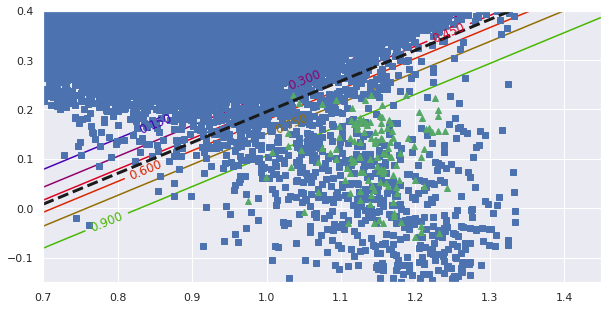

In [100]:
# YOUR CODE HERE
X_new_2d = np.c_[xx.ravel(), yy.ravel()]

y_proba = clf_2d_logistic.predict_proba(X_new_2d)

xlim_array = np.array(xlim)

plt.figure(figsize=(10, 5))
plt.plot(X_test_2d[y_test==0, 0], X_test_2d[y_test==0, 1], "bs")
plt.plot(X_test_2d[y_test==1, 0], X_test_2d[y_test==1, 1], "g^")

zz = y_proba[:, 1].reshape(xx.shape)
contour = plt.contour(xx, yy, zz, cmap=plt.cm.brg)

boundary = -(clf_2d_logistic.coef_[0][0] * xlim_array + clf_2d_logistic.intercept_[0]) / clf_2d_logistic.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(xlim, boundary, "k--", linewidth=3)
plt.axis([0.7, 1.45, -0.15, 0.4]);

Now train an SVM classifier that can support a non-linear decision boundary on the same problem.

In [101]:
# YOUR CODE HERE
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
gamma = 0.5
C = 10000
hyperparams = gamma, C

svm_clfs = []

svm_clf = Pipeline((
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ))

svm_clf.fit(X_train_2d, y_train)
svm_clfs.append(svm_clf)

Replicate for the SVM your plot above for the 2D logistic regression model.  Over the domain specified above plot the decision function score.  Overlay on your plot the data instances, highlighting whether a RR Lyrae or background star, and the decision boundary.

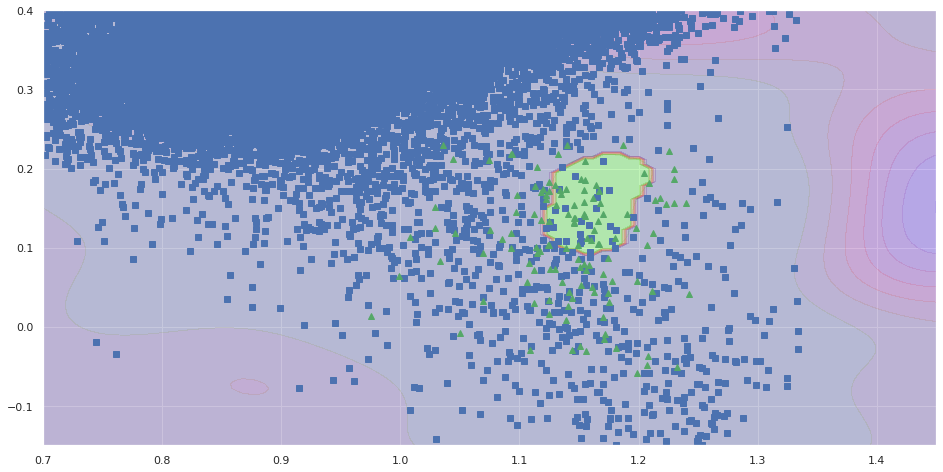

In [102]:
# YOUR CODE HERE
def plot_predictions(clf, axes):
    y_pred_svm_clf = clf.predict(X_new_2d).reshape(xx.shape)
    y_decision_svm_clf = clf.decision_function(X_new_2d).reshape(xx.shape)
    plt.contourf(xx, yy, y_pred_svm_clf, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(xx, yy, y_decision_svm_clf, cmap=plt.cm.brg, alpha=0.1)

plt.figure(figsize=(16, 8))
plt.plot(X_test_2d[y_test==0, 0], X_test_2d[y_test==0, 1], "bs")
plt.plot(X_test_2d[y_test==1, 0], X_test_2d[y_test==1, 1], "g^")
plot_predictions(svm_clf, [0.7, 1.45, -0.15, 0.4])

Compute the precision and recall of your 2D SVM model. Use variables `precision_svm` and `recall_svm` for your results.

In [103]:
# YOUR CODE HERE
clf_svm_2d_pred = svm_clf.predict(X_test_2d)
precision_svm = precision_recall_fscore_support(y_test, clf_svm_2d_pred, average='weighted')[0]
recall_svm = precision_recall_fscore_support(y_test, clf_svm_2d_pred, average='weighted')[1]

In [104]:
check_var_defined('precision_svm')
print("precision_svm = {0:.6f}".format(precision_svm))

precision_svm defined.
precision_svm = 0.993842


In [105]:
check_var_defined('recall_svm')
print("recall_svm = {0:.6f}".format(recall_svm))

recall_svm defined.
recall_svm = 0.995018


Comment on the difference in decision boundary between your logistic regression and SVM models and how this impacts the effectiveness of the models.

The difference in decision boundary between logistic regerssion and SVM models is significant. In logistic regression, it adopted the approach that the classification is divided by a straight line (decision boundary). The main drawback of this decision boundary is that some of the Background stars are included in the RR Lyrae class (right hand side). It woulld impact the effectiveness of the model, which lowers the power of predicting a correct class. 

Turning into the SVM model, it enables to classify two stars by a non-linear decision boundary. It provides a higher effectiveness on prediction, which is also reflected in the SVM precision and recall scores. However, due to the large amount of class overlap and the problem of imbalanced classification, the decision boundary is inevitably unable to seperate these two classes perfectly. It can only lay out the most concentrated areas for RR Lyrae. 

Thus, compared to the logistic regression, the SVM model provides a higher effectiveness on classification.